## Вязко-Упругая деформация

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
class Lab7(object):
    def __init__(self, v, e, p, h, k, number_of_values, number_of_shifts, init_values=None):
        self.nu = v
        self.e = e
        self.h = h
        self.k = k
        self.p = p
        self.number_of_shifts = number_of_shifts
        self.number_of_values = number_of_values
        self.values = np.zeros((self.number_of_values, self.number_of_shifts))
        if init_values is None:
            for i in range(self.number_of_values):
                self.values[0, i] = float(input(()))
        else:
            self.values[0, :] = init_values
        self.values[1, :] = self.values[0, :]
        self.values[:, -1] = self.values[0, -1]
        self.add_deformation()
    
    def calculate_new_value(self, i, j):
        first_step = self.values[i, j+1] - 2 * self.values[i, j] + self.values[i, j-1]
        first_step /= self.h**2
        second_step = 2 * self.p / (self.e*self.k*self.k) + self.p / (self.nu * self.k)
        second_step *= self.values[i,j]
        third_step = self.p/(self.e * self.k*self.k)
        third_step *= self.values[i-1, j]
        fourth_step = self.p/(self.e*self.k*self.k) + self.p / (self.nu * self.k)
        self.values[i+1, j] = (first_step + second_step - third_step) / fourth_step
        
    def add_deformation(self):
        self.values[5:15, -1] = np.array([0.097,0.094, 0.091,0.088, 0.085, 0.085, 0.088, 0.091, 0.094, 0.097])  
                                         
    def solve(self):
        for i in range(1, self.number_of_values-1):
            for j in range(1, self.number_of_shifts-1):
                self.calculate_new_value(i, j)
    
    @staticmethod
    def print_matrix(matrix, message):
        print(message)
        data = pd.DataFrame(matrix)
        display(data)
    
    def plot_results(self):
        plt.figure(dpi=300)
        for i in range(self.number_of_shifts):
            plt.plot(self.values[:, i])
        plt.grid(True)
        plt.show()
    
    def main(self):
        self.solve()
        self.plot_results()
        self.print_matrix(self.values, "Результат")

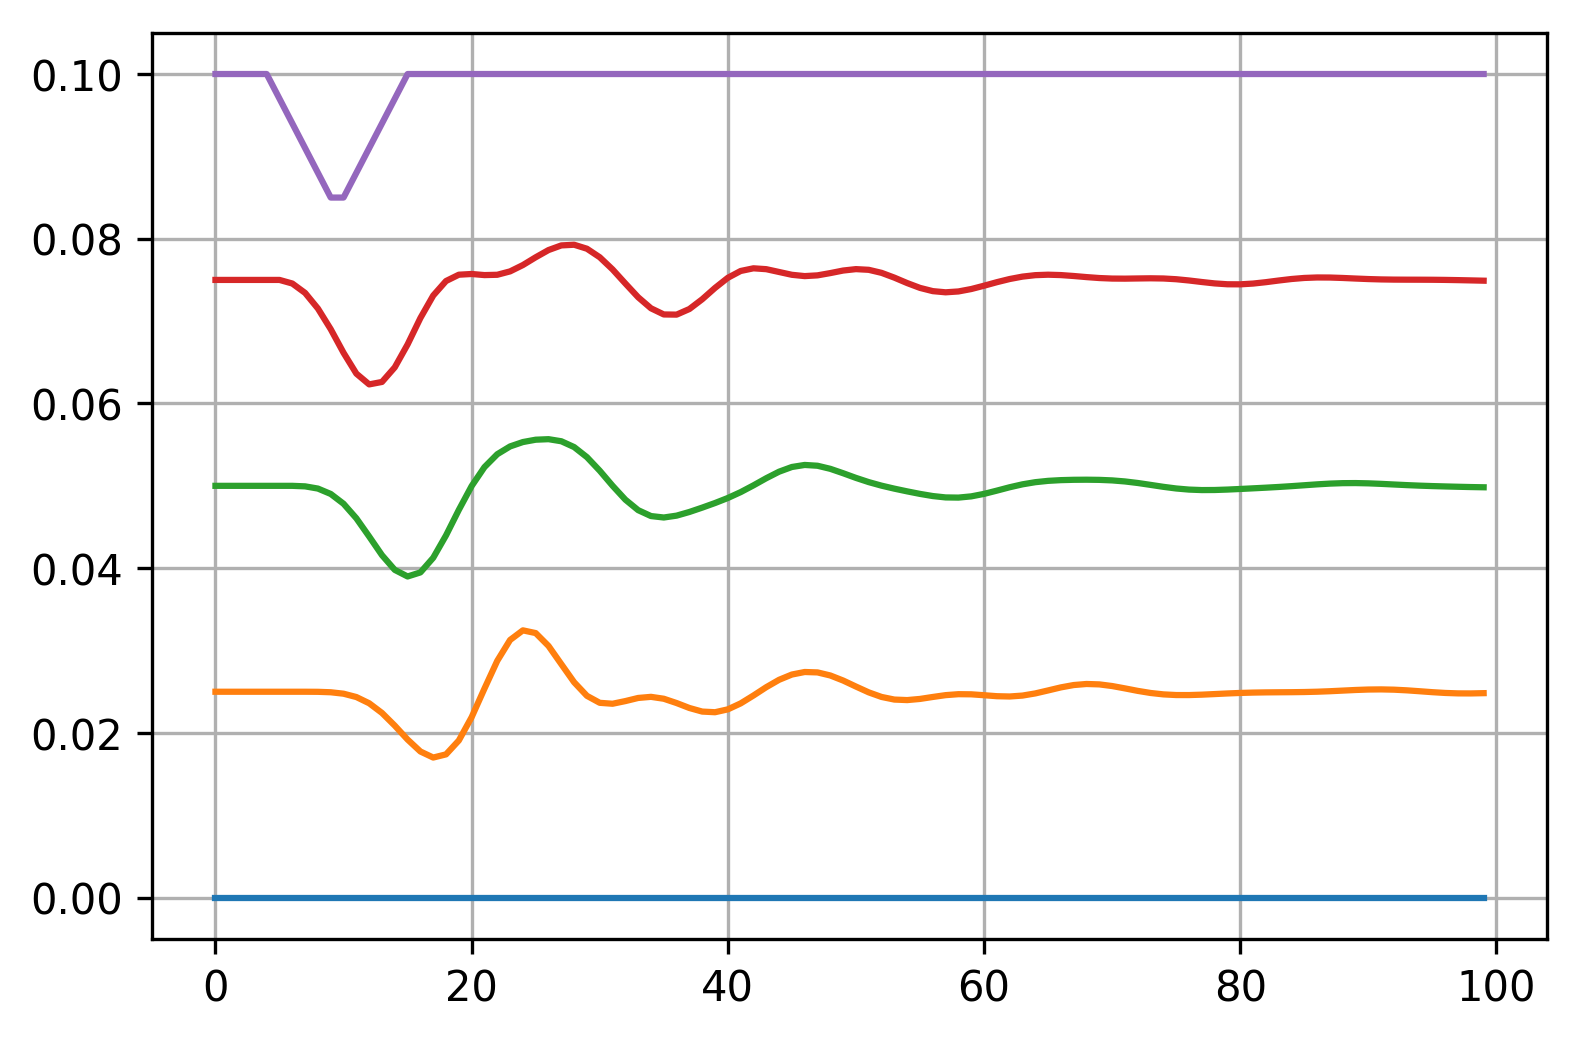

Результат


,0,1,2,3,4
0,0.0,0.025000,0.050000,0.075000,0.100
1,0.0,0.025000,0.050000,0.075000,0.100
2,0.0,0.025000,0.050000,0.075000,0.100
3,0.0,0.025000,0.050000,0.075000,0.100
4,0.0,0.025000,0.050000,0.075000,0.100
5,0.0,0.025000,0.050000,0.075000,0.097
6,0.0,0.025000,0.050000,0.074564,0.094
7,0.0,0.025000,0.049937,0.073421,0.091
8,0.0,0.024991,0.049668,0.071524,0.088
9,0.0,0.024937,0.049013,0.069016,0.085


In [21]:
v = 200.
e = 4000.
p = 1000.
h = 0.025
k = 0.005
number_of_values = 100
number_of_shifts = 5
init_values = np.array([0., 0.025, 0.05, 0.075, 0.1])
test = Lab7(v, e, p, h, k, number_of_values, number_of_shifts, init_values)
test.main()